<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/MLP/case_study/bulldozer/MLP_Term_3_Regression_Case_Study_Bulldozer_dataset_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset for this colab is available: [Training and validation set](https://drive.google.com/file/d/1Ji3oeXia4H4dd4bWpxkgTRfECS6Avn1d/view?usp=sharing) and [Test dataset](https://drive.google.com/file/d/1FWyWSnHNb28bit3mj2xrW5KpcvPKglGo/view?usp=sharing). The codes are written based on [ROMAN VELICHKIN's codes](https://www.kaggle.com/code/romanvelichkin/blue-book-for-bulldozers-how-to-get-into-top-25).

The purpose of this study was to forecast the auction sale price of a specific piece of heavy equipment (a bulldozer) based on its usage, equipment type, and configuration. The information comes from auction result postings and covers use and equipment settings.
The RMSLE (root mean squared log error) between the actual and forecast auction prices is the competition's evaluation metric.

The data page contains links to sample submission files. Files submitted should be formatted as follows:

A newly created` header  `SalesID,SalePrice`;
has two columns:

`SalesID`: The validation set's SalesID in sorted order;
`SalePrice`: Your estimated sale price.

# [Root Mean Squared Log Error (RMSLE)](https://www.kaggle.com/code/carlolepelaars/understanding-the-metric-rmsle)

The formula for RMSLE is as follows:

$RMSLE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(p_i +1)-log(a_i +1))^2}$

where:

$n$  is the total number of observations in the (public/private) data set,

$p_i$  is the prediction of target, and

$a_i$  is the actual target for  $i$ .

$log(x)$  is the natural logarithm of  $x  ( log_e(x)$ .

#Prepare tools

##Random Forest Regression

Every decision tree has a significant variance, but when we mix all of them in parallel, the final variance is low since each decision tree is perfectly trained on that specific sample data, and so the outcome is dependent on numerous decision trees rather than one. In the case of a classification problem, the majority voting classifier is used to determine the final output. The final output of a regression problem is the mean of all the outputs. Aggregation is the name given to this section.

Random Forest is an ensemble technique that can handle both regression and classification tasks by combining many decision trees and a technique known as Bootstrap and Aggregation, or bagging. The core idea is to use numerous decision trees to determine the final output rather than depending on individual decision trees.

In [ ]:
# import exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# models from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# model evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Inspect data

In [ ]:
# Importing training and validation sets
df = pd.read_csv("TrainAndValid.csv", 
                 low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282492 entries, 0 to 282491
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   282492 non-null  int64  
 1   SalePrice                 282492 non-null  int64  
 2   MachineID                 282492 non-null  int64  
 3   ModelID                   282492 non-null  int64  
 4   datasource                282492 non-null  int64  
 5   auctioneerID              282492 non-null  int64  
 6   YearMade                  282492 non-null  int64  
 7   MachineHoursCurrentMeter  35074 non-null   float64
 8   UsageBand                 32148 non-null   object 
 9   saledate                  282492 non-null  object 
 10  fiModelDesc               282492 non-null  object 
 11  fiBaseModel               282492 non-null  object 
 12  fiSecondaryDesc           177723 non-null  object 
 13  fiModelSeries             37955 non-null   o

In [ ]:
df.isna().sum() #Finding missing values

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter    247418
UsageBand                   250344
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             104769
fiModelSeries               244537
fiModelDescriptor           240146
ProductSize                 149382
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                207833
Enclosure                      250
Forks                       146579
Pad_Type                    225341
Ride_Control                177053
Stick                       225341
Transmission                152517
Turbocharged                225341
Blade_Extension     

In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(4, 4))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

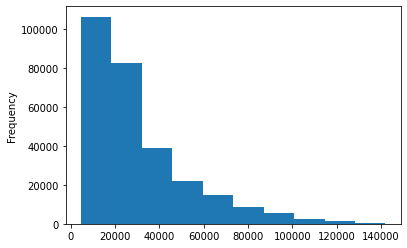

In [ ]:
# Sales prices distribution
df.SalePrice.plot.hist();

In [ ]:
# Sales distribution over states
df.state.value_counts()

Florida           47341
Texas             34255
California        18841
Washington        10691
Mississippi        9970
Georgia            9710
Ohio               9017
Pennsylvania       8445
Maryland           8442
New Jersey         8322
Illinois           7978
Alabama            7370
Colorado           7350
South Carolina     7099
North Carolina     6842
New York           6525
Tennessee          6474
Arizona            5859
Connecticut        5460
Louisiana          5355
Minnesota          5352
Maine              4979
Kentucky           4383
Missouri           4192
Nevada             3902
Indiana            3311
Unspecified        2789
New Mexico         2405
New Hampshire      2282
Arkansas           2217
Wisconsin          1949
Utah               1663
Wyoming            1488
Virginia           1384
Idaho              1350
Oregon             1331
Montana             890
Oklahoma            796
Iowa                735
Kansas              611
West Virginia       544
Delaware        

In [ ]:
# Import data again but this time parse dates
df = pd.read_csv("TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [ ]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

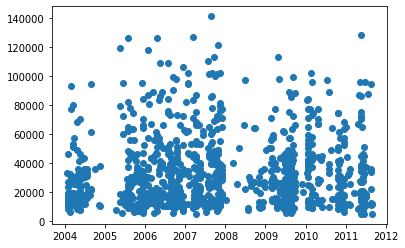

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [ ]:
# Look on data again. 
# There are too many columns so I turned dataframe to 90 degrees. 
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
# Sort dataframe in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head()

205615   1989-01-17
127923   1989-01-31
238656   1989-01-31
81383    1989-01-31
127000   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
# Make a copy
df_tmp = df.copy()
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
127923,1476008,23000,1492205,7277,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
238656,1740836,10000,1531656,11933,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
127000,1474844,11250,1279993,7257,132,99.0,1979,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23968,1222813,102000,1038562,13316,121,3.0,2006,1764.0,Low,2011-12-29,...,32 inch,None or Unspecified,None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
23970,1222817,11000,999753,25175,121,3.0,2002,7140.0,High,2011-12-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23971,1222820,100000,1010621,16725,121,3.0,2005,9946.0,High,2011-12-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
23972,1222821,100000,1016175,16725,121,3.0,2005,9341.0,High,2011-12-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [ ]:
#df_tmp["SaleYear"] = pd.to_datetime(df_tmp["SaleYear"])

# Cal Year
#df_Time_Table['Year'] = df_Time_Table['Date'].dt.strftime('%Y')

In [ ]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [ ]:
# Drop column "saledate"
df_tmp.drop("saledate", axis=1, inplace=True)

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
# Check for which numeric columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).any():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# Fill numeric values with median

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).any():
            # Add binary column which tells us if data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [ ]:
# Check if there's still any null numeric values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).any():
            print(label)

In [ ]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,1061.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
127923,1476008,23000,1492205,7277,132,99.0,1975,1061.0,NaN,950,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
238656,1740836,10000,1531656,11933,132,99.0,1975,1061.0,NaN,D65,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
81383,1379228,31000,1082797,7620,132,99.0,1986,1061.0,NaN,IT12,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
127000,1474844,11250,1279993,7257,132,99.0,1979,1061.0,NaN,910,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True


In [ ]:
# Check how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    302500
True       5326
Name: auctioneerID_is_missing, dtype: int64

In [ ]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              272486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        110086
fiModelSeries                          267664
fiModelDescriptor                      261310
ProductSize                            163139
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           224859
Enclosure                                 264
Forks                             

In [ ]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# How will look state values after turning into numbers
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ..., 43, 43, 10], dtype=int8)

In [ ]:
# How will look missing values after turning into numbers
pd.Categorical(df_tmp["UsageBand"]).codes

array([-1, -1, -1, ...,  0,  0,  1], dtype=int8)

In [ ]:
# Turn categorical variables into numbers and fill missing

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binart column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn all categories into numbers
        # Null values will be turned into "-1" so we add +1 to all numbers
        df_tmp[label] = pd.Categorical(content).codes + 1

In [ ]:
# Let's look result
df_tmp.head().T

,205615,127923,238656,81383,127000
SalesID,1646770,1476008,1740836,1379228,1474844
SalePrice,9500,23000,10000,31000,11250
MachineID,1126363,1492205,1531656,1082797,1279993
ModelID,8434,7277,11933,7620,7257
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,True
Blade_Type_is_missing,False,True,False,True,True
Travel_Controls_is_missing,False,True,False,True,True
Differential_Type_is_missing,True,False,True,False,False


In [ ]:
# Check if there are still any null values
df_tmp.isna().sum().sort_values(
    ascending=False)

SalesID                         0
ProductSize_is_missing          0
Stick_is_missing                0
Ride_Control_is_missing         0
Pad_Type_is_missing             0
                               ..
Hydraulics                      0
Engine_Horsepower               0
Enclosure_Type                  0
Blade_Width                     0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [ ]:
%%time
# Let's test what's RFC performance on given data
#Takes long time to run, approx 5 m 22 s
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 10min 24s, sys: 2.08 s, total: 10min 26s
Wall time: 5min 21s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Score the model on initial data
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9872959396817406

In [ ]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,1061.0,0,3832,...,True,True,True,True,True,False,False,False,True,True
127923,1476008,23000,1492205,7277,132,99.0,1975,1061.0,0,1517,...,True,True,True,True,True,True,True,True,False,False
238656,1740836,10000,1531656,11933,132,99.0,1975,1061.0,0,1974,...,True,True,True,True,True,False,False,False,True,True
81383,1379228,31000,1082797,7620,132,99.0,1986,1061.0,0,2636,...,True,True,True,True,True,True,True,True,False,False
127000,1474844,11250,1279993,7257,132,99.0,1979,1061.0,0,1477,...,True,True,True,True,True,True,True,True,False,False


In [ ]:
df_tmp.saleYear

205615    1989
127923    1989
238656    1989
81383     1989
127000    1989
          ... 
23968     2011
23970     2011
23971     2011
23972     2011
23967     2011
Name: saleYear, Length: 307826, dtype: int64

In [ ]:
# Split data into training and validation sets
# Data from 2011 will be used for validation
df_val = df_tmp[df_tmp.saleYear == 2011]
df_train = df_tmp[df_tmp.saleYear != 2011]

len(df_train), len(df_val)


(296995, 10831)

In [ ]:
 len(df_val)

In [ ]:
# Split train and validation sets into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_val, y_val = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((296995, 102), (296995,), (10831, 102), (10831,))

In [ ]:
y_train

In [ ]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y, y_preds))

# Create function to evaluate model using different metrics
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"training MAE": mean_absolute_error(y_train, train_preds),
              "validation MAE": mean_absolute_error(y_val, val_preds),
              "training RMSLE": rmsle(y_train, train_preds),
              "validation RMSLE": rmsle(y_val, val_preds),
              "training R^2": r2_score(y_train, train_preds),
              "validation R^2": r2_score(y_val, val_preds)
             }
    return scores

In [ ]:
# Change max samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [ ]:
%%time
model.fit(X_train, y_train)

CPU times: user 30.9 s, sys: 183 ms, total: 31.1 s
Wall time: 16.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
show_scores(model)

{'training MAE': 5189.220454115388,
 'validation MAE': 6615.768062044132,
 'training RMSLE': 0.24674790753663495,
 'validation RMSLE': 0.2839581715208452,
 'training R^2': 0.8711200240093404,
 'validation R^2': 0.8154904348116985}

#Hyperparameters tuning with RandomizedSearchCV

In [ ]:
%%time

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": [30, 40, 50],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": [10, 14, 18],
           "min_samples_leaf": [1, 2, 3],
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomiedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                                                   param_distributions=rf_grid,
                                                   n_iter=10,
                                                   cv=5,
                                                   verbose=True)
#Took time, approx 3m 29s
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 1min 38s, sys: 4.57 s, total: 1min 43s
Wall time: 3min 29s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [10, 14, 18],
                                        'n_estimators': [30, 40, 50]},
                   verbose=True)

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 18,
 'min_samples_leaf': 2,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [ ]:
# Evaluate the RandomizedSearh model
show_scores(rs_model)

{'training MAE': 5568.281738040912,
 'validation MAE': 6928.9930126353765,
 'training RMSLE': 0.2601428154282552,
 'validation RMSLE': 0.2945123693514656,
 'training R^2': 0.8509069955343996,
 'validation R^2': 0.7967399404175404}

#Hyperparameters tuning with GridSearchCV

In [ ]:
%%time

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": [170, 200],
           "min_samples_split": [4, 5],
           "min_samples_leaf": [2],
           "max_features": [0.4, 0.45, 0.5],
           "max_samples": [10000]}

# Instantiate GridSearchCV model
gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1,
                                              random_state=42),
                                              param_grid=rf_grid,
                                              cv=5,
                                              verbose=True)

gs_model.fit(X_train, y_train)

#Make predictions on test data

In [ ]:
# Import the test data
df_test = pd.read_csv("Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [ ]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

#Preprocessing test data (getting it into same format as training dataset)

In [ ]:
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df
    """
    # Enrich dataframe with date time features
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Now when we enriched our dataframe with date time features we can drop column "saledate"
    df.drop("saledate", axis=1, inplace=True)

    # Fill numeric values with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add binary column which tells us if data was misasing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

    # Turn categorical variables into numbers and fill missing
        if not pd.api.types.is_numeric_dtype(content):
            # Add binart column to indicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn missing categories into number and add +1
            df[label] = pd.Categorical(content).codes + 1
            
    return df

In [ ]:
df_test = preprocess_data(df_test)
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [ ]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
# Adding auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [ ]:
# Make predictions on test data using random forest
test_preds = model.predict(df_test)

test_preds

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([20454.  , 22136.5 , 53650.  , ..., 17736.23, 15903.5 , 22840.  ])

In [ ]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,20454.00
1,1227844,22136.50
2,1227847,53650.00
3,1227848,70967.50
4,1227863,35376.50
...,...,...
12452,6643171,49272.00
12453,6643173,12441.00
12454,6643184,17736.23
12455,6643186,15903.50


In [ ]:
# Find feature importance of the random forest model
model.feature_importances_

array([5.63904071e-02, 1.86469273e-02, 2.74063839e-02, 3.69371836e-04,
       6.60525722e-03, 2.60668492e-01, 4.47299781e-03, 9.01185269e-04,
       1.99288085e-02, 7.01110926e-02, 5.03193821e-02, 3.20012548e-03,
       2.77260763e-03, 2.23958177e-01, 3.32864985e-02, 1.11196679e-02,
       9.49191027e-04, 1.39568755e-03, 1.88274884e-03, 1.06151448e-02,
       5.15881921e-04, 5.55675405e-05, 8.82854777e-04, 3.45841484e-04,
       7.36546531e-04, 1.03527808e-04, 9.89501355e-05, 1.28465649e-02,
       1.07738408e-03, 1.48273272e-04, 6.25875552e-03, 1.83395143e-03,
       2.73238967e-03, 1.14188103e-03, 1.37011046e-03, 2.58329601e-03,
       1.31821987e-03, 1.44129315e-02, 8.63858040e-04, 1.04983062e-03,
       1.94691334e-04, 1.42911134e-03, 1.64109976e-03, 7.73468869e-04,
       3.68335786e-04, 8.80644167e-04, 1.51824975e-04, 2.31984922e-03,
       6.82102012e-04, 2.39383193e-04, 1.26954684e-04, 7.20352511e-02,
       4.64289015e-03, 1.22829816e-02, 5.90534456e-03, 1.39385043e-02,
      

In [ ]:
# Create dataframe with feature importances
features = (pd.DataFrame({"features": df_test.columns,
                          "feature_importances": model.feature_importances_})
            .sort_values("feature_importances", ascending=False)
            .reset_index(drop=True))

features

,features,feature_importances
0,YearMade,0.260668
1,ProductSize,0.223958
2,saleYear,0.072035
3,fiBaseModel,0.070111
4,SalesID,0.056390
...,...,...
97,state_is_missing,0.000000
98,ProductGroup_is_missing,0.000000
99,ProductGroupDesc_is_missing,0.000000
100,Drive_System_is_missing,0.000000


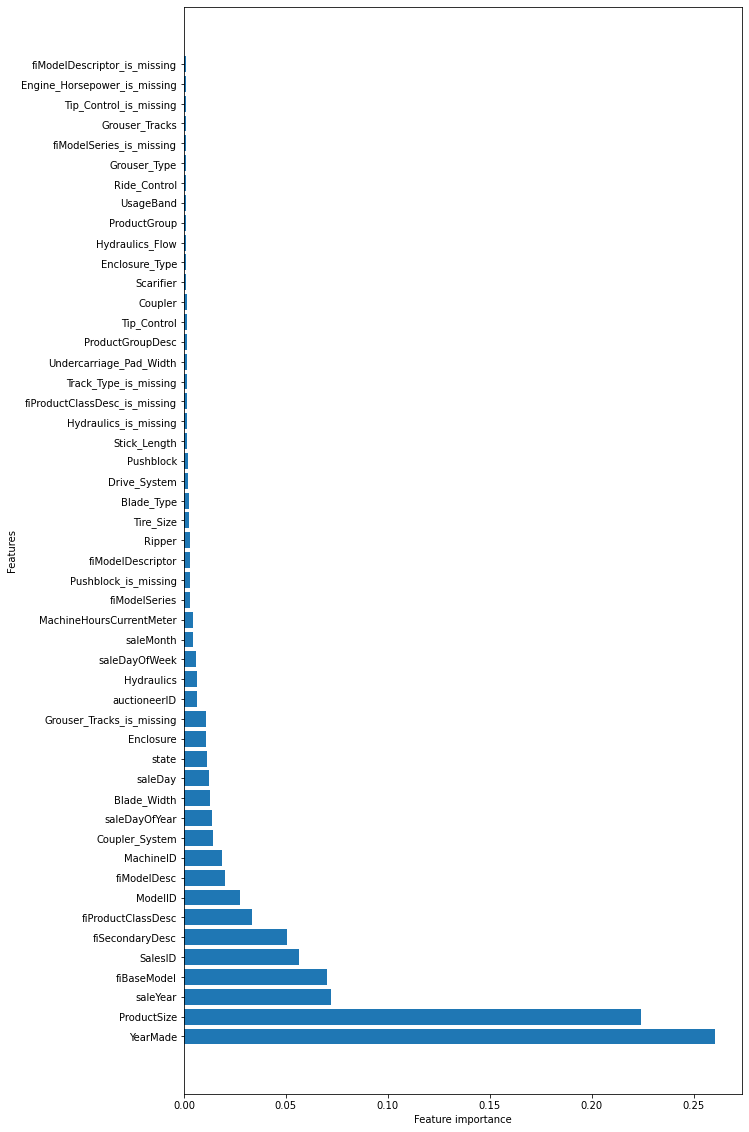

In [ ]:
# Plot the dataframe
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(features["features"][:50], features["feature_importances"][:50])
ax.set_ylabel("Features")
ax.set_xlabel("Feature importance");